In [3]:
import requests
import pandas as pd
import random

In [4]:
def populate_city():
    dataFrame = pd.read_csv("cities_list1.csv")
    
    num_rows = dataFrame.shape[0]
    column_names = ['country', 'name']
    random_cells = {}
    for column in range(200):
        row = random.randint(0, num_rows - 1)
        key = dataFrame.at[row, column_names[0]]
        value = dataFrame.at[row, column_names[1]]
        random_cells[key] = value
    return random_cells


def get_weather(api_key, city):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city,
        'appid': api_key,
        'units' : 'metric'
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        print
        temperature = data['main']['temp']
        description = data['weather'][0]['description']
        country = data['sys']['country']
        wind_speed = data['wind']['speed']
        wind_direction = data['wind']['deg']
        return country, city, temperature, wind_speed, wind_direction, description
    except requests.exceptions.RequestException as e:
        return f"Error connecting to OpenWeatherMap API: {e}"

    
api_key = "0f742097a737c47ecf2da205e62a0853"


cities = {}
if not cities:
    cities = populate_city()

column_names = ["Country", "City", "Temp(°C)","Wind Speed", "Wind Direction(°)", "Description"]
weather_data = []
for city in cities:
    data = get_weather(api_key, cities[city])
    if 'Error connecting to OpenWeatherMap API' in data:
        continue
    weather_data.append(data)

df = pd.DataFrame(weather_data, columns = column_names)

df.to_csv('weather_data.csv')
data = pd.read_csv('weather_data.csv')
print(data)

    Unnamed: 0 Country         City  Temp(°C)  Wind Speed  Wind Direction(°)  \
0            0      AS    Pago Pago     31.55        3.09                  0   
1            1      LY      Tripoli     12.70        1.84                156   
2            2      ZA       Soweto     17.31        0.00                  0   
3            3      ET  Addis Ababa     15.49        5.66                 50   
4            4      AR      Cordoba     32.09        4.12                 40   
..         ...     ...          ...       ...         ...                ...   
93          93      DM       Roseau     26.01        2.62                 85   
94          94      AW   Oranjestad     27.73        9.26                 80   
95          95      KM       Moroni     26.21        1.24                177   
96          96      BD        Dhaka     18.99        0.00                  0   
97          97      UZ     Tashkent      0.97        5.14                200   

         Description  
0      broken cl

In [72]:
print(data.shape)
# data = data.iloc[1:]
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(25)

(107, 7)


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,City,Temp(°C),Wind Speed,Wind Direction(°),Description
1,BR,Manaus,26.27,1.54,60,clear sky
2,BH,Manama,24.68,3.09,50,few clouds
3,FR,Paris,8.03,3.09,160,broken clouds
4,CO,Barranquilla,24.88,4.63,30,fog
5,US,Melbourne,9.01,4.63,280,clear sky
6,IS,Reykjavik,-1.19,9.77,300,snow
7,GB,London,7.45,4.92,257,overcast clouds
8,HK,Kowloon,20.45,4.02,90,broken clouds
9,MN,Ulan Bator,-29.93,2.00,0,clear sky
10,UG,Kampala,25.66,2.91,198,overcast clouds


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 1 to 107
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            107 non-null    object 
 1   City               107 non-null    object 
 2   Temp(°C)           107 non-null    float64
 3   Wind Speed         107 non-null    float64
 4   Wind Direction(°)  107 non-null    int64  
 5   Description        107 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.1+ KB


In [54]:
data['Country'].unique()

array(['ID', 'BR', 'BH', 'FR', 'CO', 'US', 'IS', 'GB', 'HK', 'MN', 'UG',
       'GT', 'UA', 'KH', 'PL', 'NG', 'CF', 'JP', 'VI', 'GR', 'IN', 'RU',
       'BD', 'ER', 'BE', 'TL', 'SR', 'ME', 'FI', 'MC', 'SS', 'NO', 'ZA',
       'IL', 'LY', 'MG', 'MX', 'TR', 'TT', 'SM', 'AF', 'MY', 'HR', 'BA',
       'VE', 'CA', 'CN', 'AR', 'LB', 'OM', 'SN', 'SV', 'BN', 'KR', 'GG',
       'AT', 'TM', 'AE', 'CD', 'MQ', 'PK', 'FO', 'CV', 'MM', 'CM', 'HU',
       'ES', 'DO', 'GM', 'TD', 'SA', 'MV', 'DM', 'VU', 'KZ', 'KI', 'KP',
       'IR', 'GA', 'FJ', 'JO', 'BW', 'LA', 'EC', 'EE', 'AZ', 'GF', 'AM',
       'TG', 'KE', 'GP', 'LC', 'NL', 'TW', 'BJ', 'MW', 'LK', 'LI', 'CK',
       'TN', 'SY', 'BB', 'PY', 'PH', 'GN', 'CZ'], dtype=object)

In [4]:
missing = data.isna().sum().sort_values(ascending=False)
print(missing)

Unnamed: 0           0
Country              0
City                 0
Temp(°C)             0
Wind Speed           0
Wind Direction(°)    0
Description          0
dtype: int64


In [6]:
data.describe()

,Unnamed: 0,Temp(°C),Wind Speed,Wind Direction(°)
count,108.00000,108.000000,108.000000,108.000000
mean,53.50000,16.741111,3.393796,143.324074
std,31.32092,12.294928,2.759479,109.390907
min,0.00000,-29.930000,0.000000,0.000000
25%,26.75000,6.950000,1.790000,40.000000
50%,53.50000,20.710000,3.090000,135.000000
75%,80.25000,26.770000,4.120000,230.000000
max,107.00000,38.250000,23.280000,360.000000


In [71]:
temperatures = data['Temp(°C)'].tolist()
cities = data['City'].tolist()
print(temperatures)
print(cities)

[26.27, 24.68, 8.03, 24.88, 9.01, -1.19, 7.45, 20.45, -29.93, 25.66, 12.91, 5.4, 32.95, 6.62, 30.18, 38.25, -1.28, 24.85, 8.25, 25.62, 0.77, 26.45, 19.07, 7.06, 27.77, 23.95, 9.88, 1.21, 12.01, 33.0, -3.06, 28.51, 12.32, 14.46, 27.98, 15.76, 4.02, 25.16, 6.99, 5.25, 30.75, 3.26, -1.05, 25.22, -6.92, 22.97, 27.53, 14.41, 28.01, 25.07, 14.93, 27.99, 3.96, 9.55, 5.05, 4.92, 29.01, 24.04, 20.97, 20.03, 5.66, 24.3, 30.98, 35.53, 2.62, 12.78, 22.44, 25.18, 26.98, 20.24, 27.54, 21.01, 24.78, -9.03, 28.29, -2.04, 6.73, 29.77, 26.71, 10.05, 26.95, 29.88, 8.53, 2.42, 7.03, 25.02, 0.09, 31.09, 25.81, 19.58, 22.53, 6.83, 21.22, 29.9, 27.11, 30.97, 10.5, 24.03, 15.89, 8.42, 26.03, 25.69, 27.55, 28.04, 0.92, -4.96, 2.08]
['Manaus', 'Manama', 'Paris', 'Barranquilla', 'Melbourne', 'Reykjavik', 'London', 'Kowloon', 'Ulan Bator', 'Kampala', 'Guatemala City', 'Kyiv', 'Phnom Penh', 'Warsaw', 'Lagos', 'Bangui', 'Sapporo', 'Charlotte Amalie', 'Athens', 'Jaipur', 'Saint Petersburg', 'Khulna', 'Asmara', 'Brus

In [66]:
min_temp = data.loc[data.groupby('City').agg({'Temp(°C)':'min'}).index]

KeyError: "None of [Index(['Abu Dhabi', 'Amman', 'Amsterdam', 'Antananarivo', 'Ashgabat', 'Asmara',\n       'Asuncion', 'Athens', 'Avarua', 'Baku',\n       ...\n       'Tripoli', 'Tunis', 'Ulan Bator', 'Vaduz', 'Vienna', 'Vientiane',\n       'Warsaw', 'Yangon', 'Yerevan', 'Zagreb'],\n      dtype='object', name='City', length=107)] are in the [index]"

ValueError: too many values to unpack (expected 2)

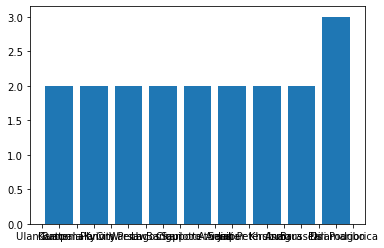

In [45]:
import matplotlib.pyplot as plt



# y = data['Temp(°C)']
# x = data['City']

# plt.bar(x, y,width = 2)
# plt.show()
# temperatures = data['Temp(°C)'].tolist()
cities = data['City'].tolist()
plt.hist(temperatures, bins=range(10, 30, 2), align="left", rwidth=0.8)
# plt.xlim([10, 29])
plt.ylim('')
plt.title("Histogram of Temperatures")
plt.grid(True)
plt.show()
# cities_temps = data.groupby(['City'])['Temp(°C)'].mean().reset_index()
# cities_temps["City"].plot(kind='bar', xlabel = 'City', ylabel = 'Temp(°C)', rot=0)


# plt.bar(x=data['City'], y=data["Temp(°C)"])
# location_temps = data.groupby(['City'])['Temp(°C)'].mean().reset_index()
# fig, ax = plt.subplots()
# ax = location_temps.plot(kind='bar', x='City', height=40)
# ax.set_title('Temparature Distribution by City')
# ax.set_xlabel("City")
# ax.set_ylabel('Temperature($^circ$C)')
# plt.show()